In [1]:
import numpy as np
import pandas as pd
from scipy import stats

df = pd.read_csv(r"C:\Users\freja\Downloads\2019 Winter Data Science Intern Challenge Data Set.csv")

In [2]:
#a. First of all, we need to take a look of the outliers of the dataset.
df = df.dropna()
order=df["order_amount"].describe()
print(order)
df1=df["order_amount"]

count      5000.000000
mean       3145.128000
std       41282.539349
min          90.000000
25%         163.000000
50%         284.000000
75%         390.000000
max      704000.000000
Name: order_amount, dtype: float64


In [3]:
df_dup=df[df.duplicated(["user_id","order_amount"])]
df_dup.sort_values(by=["user_id"],inplace=True)
print(df_dup)
df_dup.to_csv(r"C:\Users\freja\Downloads\dup.csv")
#it appears the order amount and the user id are the same at the same time of the day.
#We could consider this buyer as a reseller and to better evaluate the dataset, we might need to get rid of this userid607.

      order_id  shop_id  user_id  order_amount  total_items payment_method  \
60          61       42      607        704000         2000    credit_card   
2835      2836       42      607        704000         2000    credit_card   
2969      2970       42      607        704000         2000    credit_card   
3332      3333       42      607        704000         2000    credit_card   
2297      2298       42      607        704000         2000    credit_card   
...        ...      ...      ...           ...          ...            ...   
3488      3489       10      994           296            2    credit_card   
3090      3091       93      996           228            2    credit_card   
4300      4301       68      999           136            1    credit_card   
4230      4231       87      999           298            2          debit   
3964      3965       33      999           173            1    credit_card   

               created_at  
60     2017-03-04 4:00:00  
2835   

C:\Users\freja\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


<AxesSubplot:>

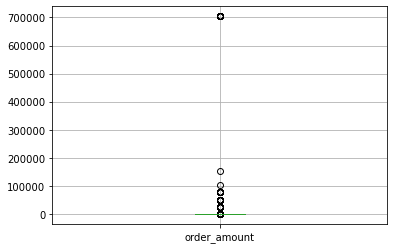

In [5]:
df.boxplot(column="order_amount")

In [9]:
IQR = stats.iqr(df1,interpolation='midpoint')
IQR

227.0

In [10]:
Q1 = np.percentile(df1, 25, interpolation = 'midpoint')
Q3 = np.percentile(df1, 75, interpolation = 'midpoint')
lower_limit=Q1-1.5*IQR
upper_limit=Q3+1.5*IQR
print("The lower bound of dataset is ", lower_limit)
print("The upper bound of dataset is ", upper_limit)
outlier =[]
for x in df1:
    if ((x> upper_limit) or (x<lower_limit)):
         outlier.append(x)
print(' outlier in the dataset is', outlier)

The lower bound of dataset is  -177.5
The upper bound of dataset is  730.5
 outlier in the dataset is [704000, 704000, 780, 765, 25725, 780, 765, 780, 780, 51450, 51450, 51450, 704000, 830, 51450, 748, 154350, 772, 804, 815, 885, 1056, 784, 25725, 704000, 815, 885, 25725, 25725, 935, 77175, 704000, 1760, 1408, 25725, 25725, 704000, 25725, 1408, 765, 736, 51450, 704000, 960, 704000, 800, 804, 800, 865, 745, 830, 880, 920, 765, 774, 790, 784, 704000, 25725, 704000, 948, 845, 760, 745, 51450, 102900, 965, 51450, 51450, 25725, 935, 77175, 780, 77175, 805, 25725, 51450, 51450, 704000, 77175, 25725, 830, 704000, 1056, 890, 980, 25725, 51450, 760, 25725, 51450, 748, 786, 704000, 77175, 736, 805, 25725, 1056, 736, 935, 1086, 736, 51450, 77175, 25725, 816, 810, 740, 25725, 704000, 51450, 1064, 77175, 780, 51450, 51450, 77175, 735, 25725, 760, 880, 780, 748, 748, 25725, 748, 800, 704000, 780, 77175, 960, 704000, 790, 704000, 760, 25725, 765, 880, 865, 772]


In [11]:
#b. we could use the median of the dataset to evaluate the data. Since some values are too faraway from the average of order amount. 
df2 = df[df.order_amount<730.5]
df2.order_amount.mean()
#c. The value is 293.715. 

293.7153735336489